### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое размышление № 3

Конечно, давайте переформулируем и перепишем ваш текст для лучшего понимания.

В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

## Задание 3. Проверка кода (0 баллов)

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
!ls

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [82]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [5]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [6]:

descent_config = {
    'descent_name': 'типа что-то делает',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [7]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Достигнуто максимальное количество итераций: 10


## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



In [8]:
pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [10]:
data = pd.read_csv('autos.csv')

In [11]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   brand              241190 non-null  object
 1   model              241190 non-null  object
 2   vehicleType        241190 non-null  object
 3   gearbox            241190 non-null  object
 4   fuelType           241190 non-null  object
 5   notRepairedDamage  241190 non-null  object
 6   powerPS            241190 non-null  int64 
 7   kilometer          241190 non-null  int64 
 8   autoAgeMonths      241190 non-null  int64 
 9   price              241190 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.4+ MB


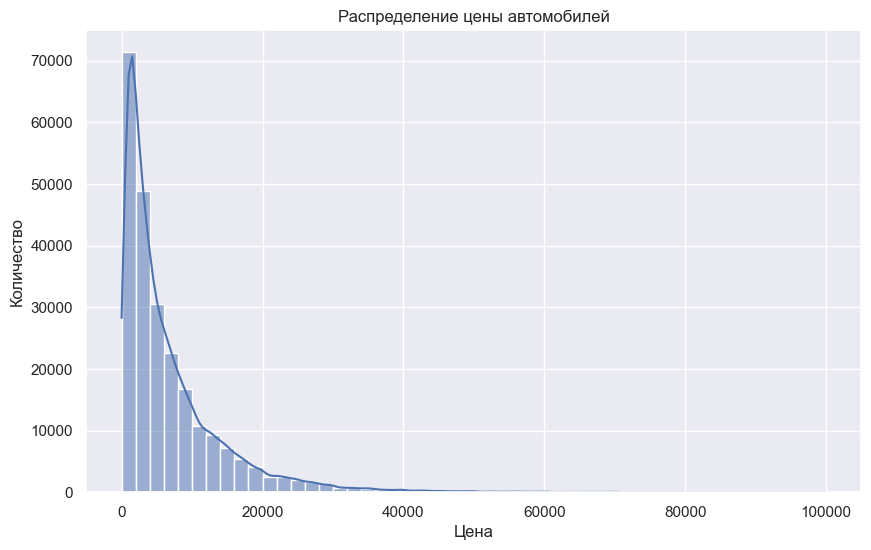

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Распределение цены автомобилей')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()

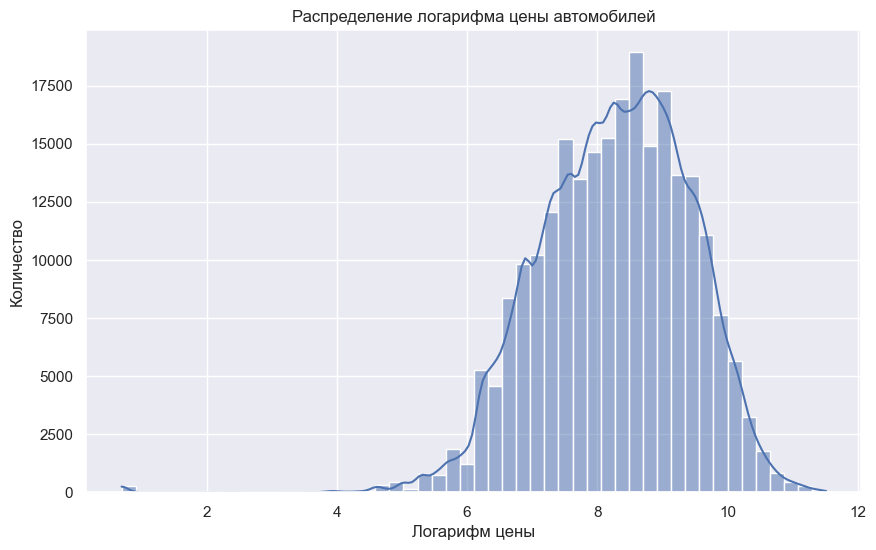

In [14]:
data['price_log'] = np.log1p(data['price'])

plt.figure(figsize=(10, 6))
sns.histplot(data['price_log'], bins=50, kde=True)
plt.title('Распределение логарифма цены автомобилей')
plt.xlabel('Логарифм цены')
plt.ylabel('Количество')
plt.show()

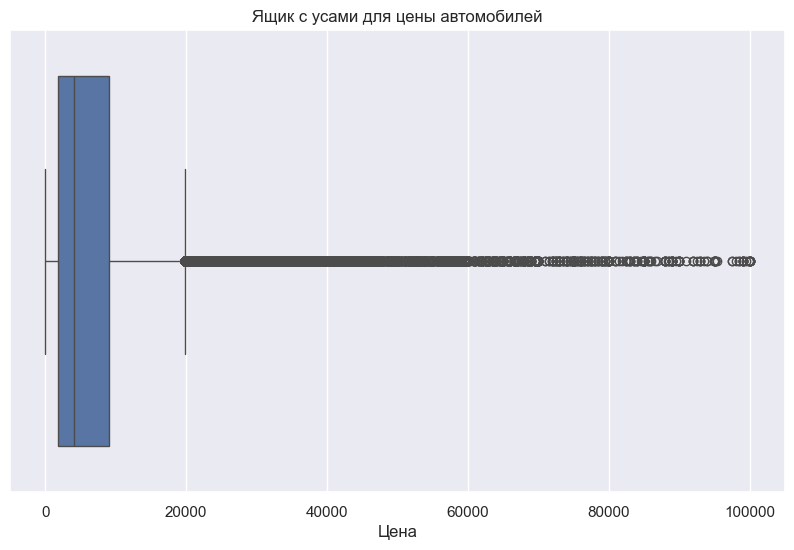

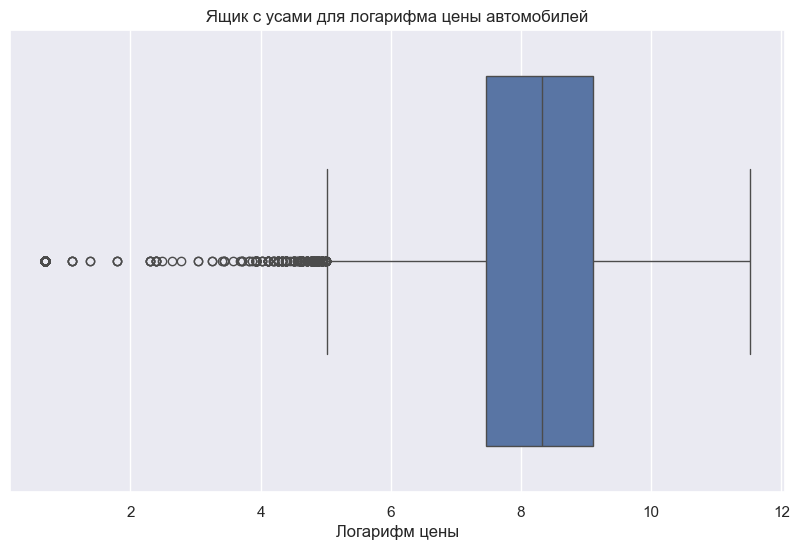

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'])
plt.title('Ящик с усами для цены автомобилей')
plt.xlabel('Цена')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price_log'])
plt.title('Ящик с усами для логарифма цены автомобилей')
plt.xlabel('Логарифм цены')
plt.show()

In [16]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Нижняя граница: {lower_bound}, Верхняя граница: {upper_bound}")

data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

Нижняя граница: -9123.5, Верхняя граница: 19872.5


Теперь глянем, что с графиков после удаления выбросов

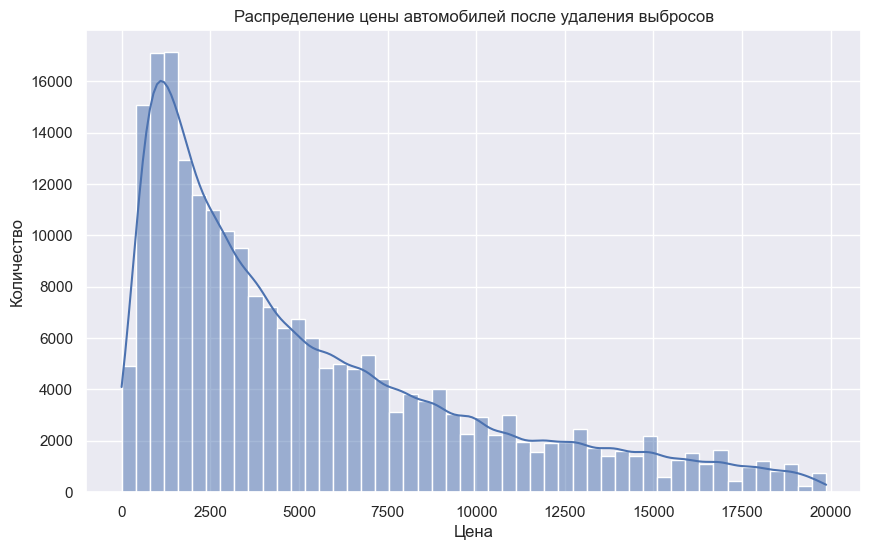

In [17]:
data['price_log'] = np.log1p(data['price'])

plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Распределение цены автомобилей после удаления выбросов')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()

In [18]:
columns = data.columns.tolist()
print("Столбцы в данных:", columns)

data.dtypes

Столбцы в данных: ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'powerPS', 'kilometer', 'autoAgeMonths', 'price', 'price_log']


brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                  int64
price_log            float64
dtype: object

In [19]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

data.isnull().sum()

#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ (EDA)

brand                0
model                0
vehicleType          0
gearbox              0
fuelType             0
notRepairedDamage    0
powerPS              0
kilometer            0
autoAgeMonths        0
price                0
price_log            0
dtype: int64

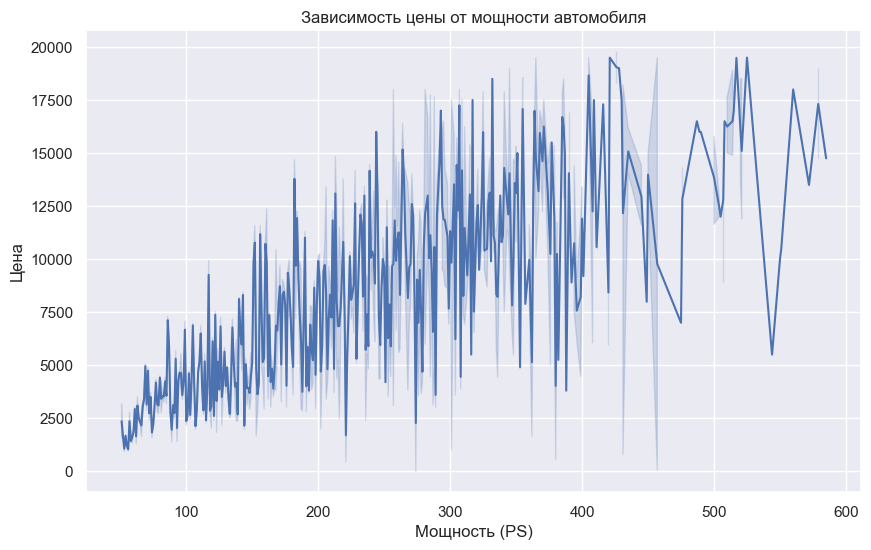

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='powerPS', y='price', data=data)
plt.title('Зависимость цены от мощности автомобиля')
plt.xlabel('Мощность (PS)')
plt.ylabel('Цена')
plt.show()

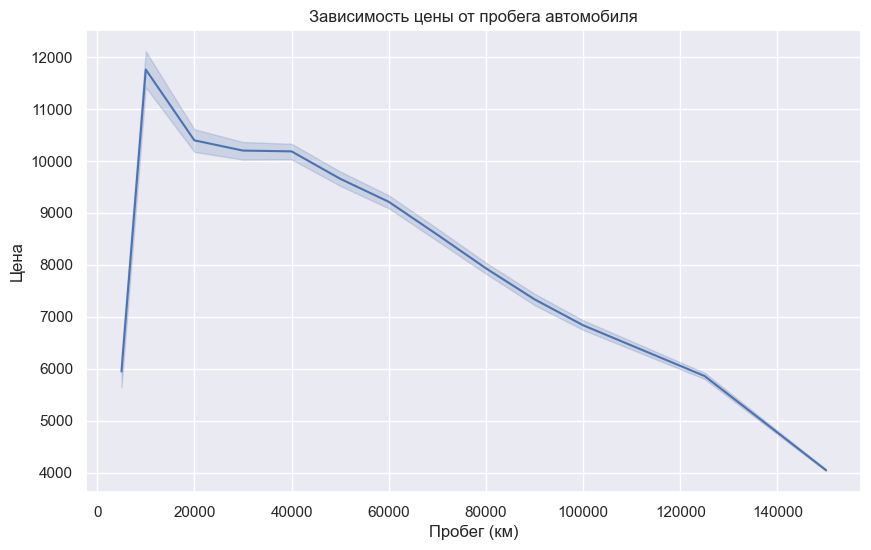

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='kilometer', y='price', data=data)
plt.title('Зависимость цены от пробега автомобиля')
plt.xlabel('Пробег (км)')
plt.ylabel('Цена')
plt.show()

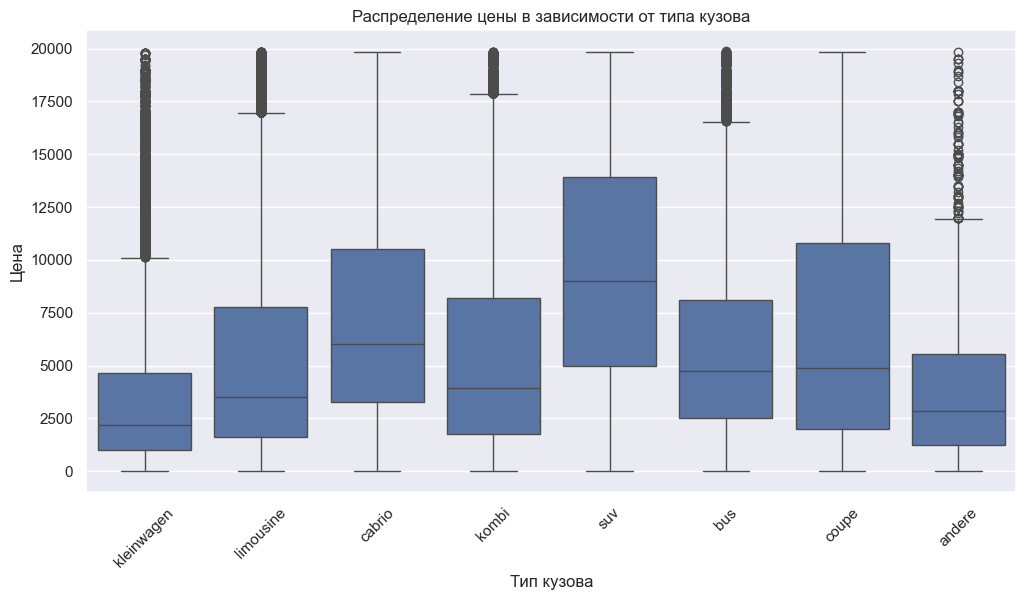

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='vehicleType', y='price', data=data)
plt.title('Распределение цены в зависимости от типа кузова')
plt.xlabel('Тип кузова')
plt.ylabel('Цена')
plt.xticks(rotation=45)
plt.show()

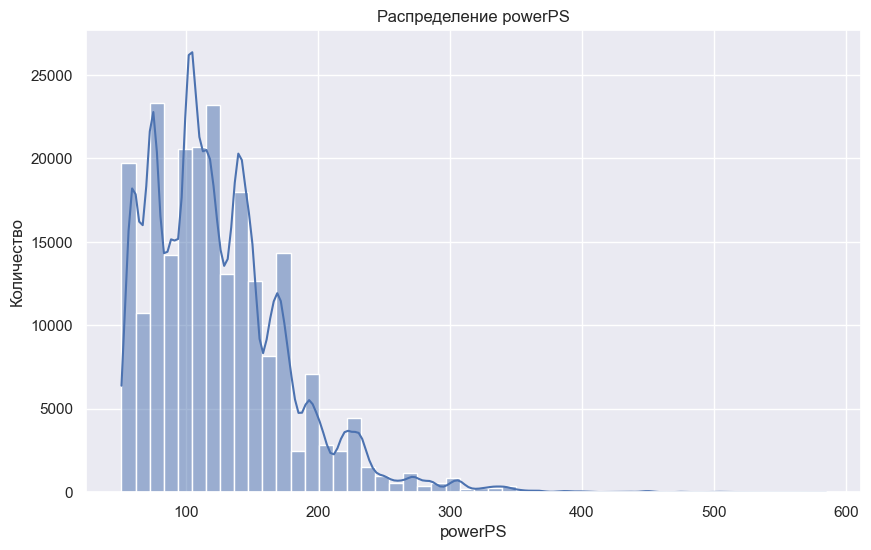

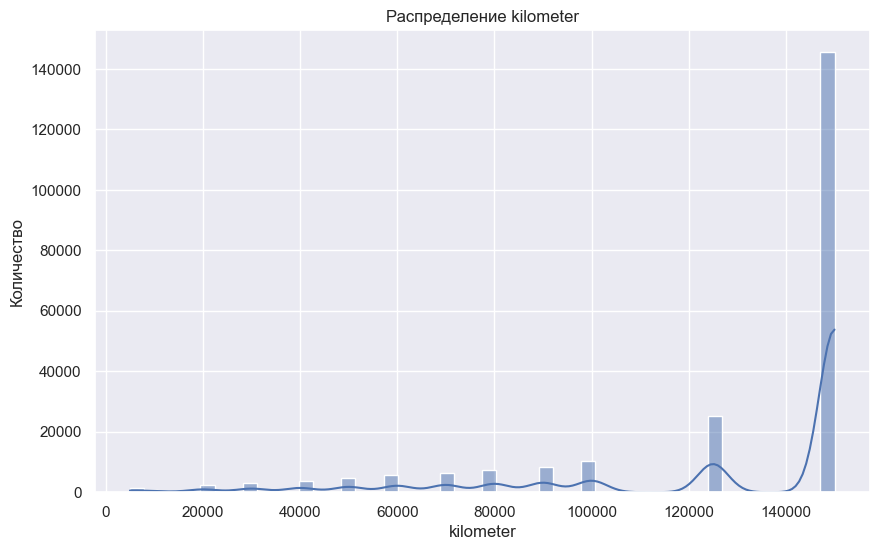

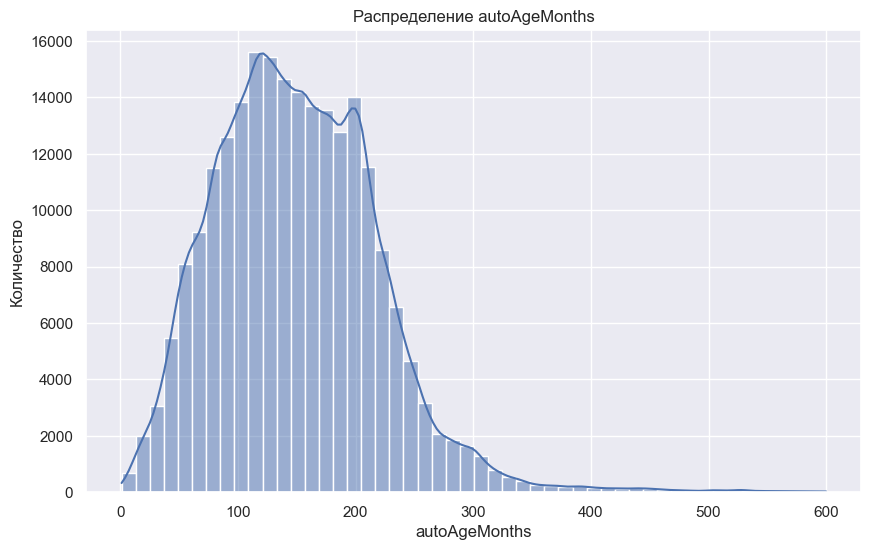

In [23]:
numeric_features = numeric
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], bins=50, kde=True)
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Количество')
    plt.show()

In [24]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

In [27]:
pip install -U scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.1 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/11.0 MB 1.1 MB/s eta 0:00:10
   --- ------------------------------------ 1.0/11.0 MB 1.1 MB/s eta 0:00:10
   ---- ----------------------------------- 1.3/11.0 MB 1.1 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/11.0 MB 1.1 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/11.0 MB 1.1 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.0 MB 1.0 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.0 MB 1.0 MB/s eta 0:00:09
   ------- -------------------------------- 2.1/11.0 MB 895.8 kB/s eta 0:00:10
   ------- -------------------------------- 2.1/11.0 MB 895.8 kB/s eta 0:00:10
   -------- ----


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import sklearn

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [29]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ (data split into train/val/test):

from sklearn.model_selection import train_test_split

x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# разделяем временную выборку на обучающую и валидационную (8:1)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=1/9, random_state=42)

print(f"Размер обучающей выборки: {x_train.shape[0]}")
print(f"Размер валидационной выборки: {x_val.shape[0]}")
print(f"Размер тестовой выборки: {x_test.shape[0]}")

Размер обучающей выборки: 180457
Размер валидационной выборки: 22558
Размер тестовой выборки: 22558


## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.



In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

In [55]:
from sklearn.metrics import r2_score, mean_squared_error
from descents import get_descent
from linear_regression import LinearRegression

lambdas = np.logspace(-5, -1, 10)  # тут при лямбда ~= 1.0e+01 loss улетают в небеса
ex5_results = {}
methods = ['full', 'momentum', 'adam', 'stochastic']

tolerance = 1e-4  # тут решил поиграться с tolerance и max_iter
max_iter = 500

for method in methods:
    ex5_results[method] = {}
    for lambda_ in lambdas:
        descent_config = {
            'descent_name': method,
            'regularized': False,
            'kwargs': {
                'dimension': x_train.shape[1],
                'lambda_': lambda_
            }
        }

        model = LinearRegression(descent_config=descent_config, tolerance=tolerance, max_iter=max_iter)
        model.fit(x_train, y_train)

        y_train_pred = model.predict(x_train)
        y_val_pred = model.predict(x_val)

        train_mse = mean_squared_error(y_train, y_train_pred)
        val_mse = mean_squared_error(y_val, y_val_pred)

        train_r2 = r2_score(y_train, y_train_pred)
        val_r2 = r2_score(y_val, y_val_pred)

        n_iterations = len(model.loss_history) - 1

        ex5_results[method][lambda_] = {
            'train_mse': train_mse,
            'val_mse': val_mse,
            'train_r2': train_r2,
            'val_r2': val_r2,
            'n_iterations': n_iterations,
            'loss_history': model.loss_history
        }

        print(f"Метод: {method}, λ: {lambda_:.1e}, Итераций: {n_iterations}, "
              f"Train MSE: {train_mse:.4f}, Val MSE: {val_mse:.4f}, "
              f"Train R2: {train_r2:.4f}, Val R2: {val_r2:.4f}")

Достигнуто максимальное количество итераций: 500
Метод: full, λ: 1.0e-05, Итераций: 500, Train MSE: 49452037.8927, Val MSE: 49478068.8013, Train R2: -1.2996, Val R2: -1.3033
Достигнуто максимальное количество итераций: 500
Метод: full, λ: 2.8e-05, Итераций: 500, Train MSE: 49132033.4356, Val MSE: 49157393.0891, Train R2: -1.2848, Val R2: -1.2884
Достигнуто максимальное количество итераций: 500
Метод: full, λ: 7.7e-05, Итераций: 500, Train MSE: 48229492.8433, Val MSE: 48253348.7249, Train R2: -1.2428, Val R2: -1.2463
Достигнуто максимальное количество итераций: 500
Метод: full, λ: 2.2e-04, Итераций: 500, Train MSE: 45863101.4741, Val MSE: 45883260.9657, Train R2: -1.1327, Val R2: -1.1360
Достигнуто максимальное количество итераций: 500
Метод: full, λ: 6.0e-04, Итераций: 500, Train MSE: 40080541.5147, Val MSE: 40091232.4429, Train R2: -0.8638, Val R2: -0.8663
Достигнуто максимальное количество итераций: 500
Метод: full, λ: 1.7e-03, Итераций: 500, Train MSE: 28685913.9406, Val MSE: 286783

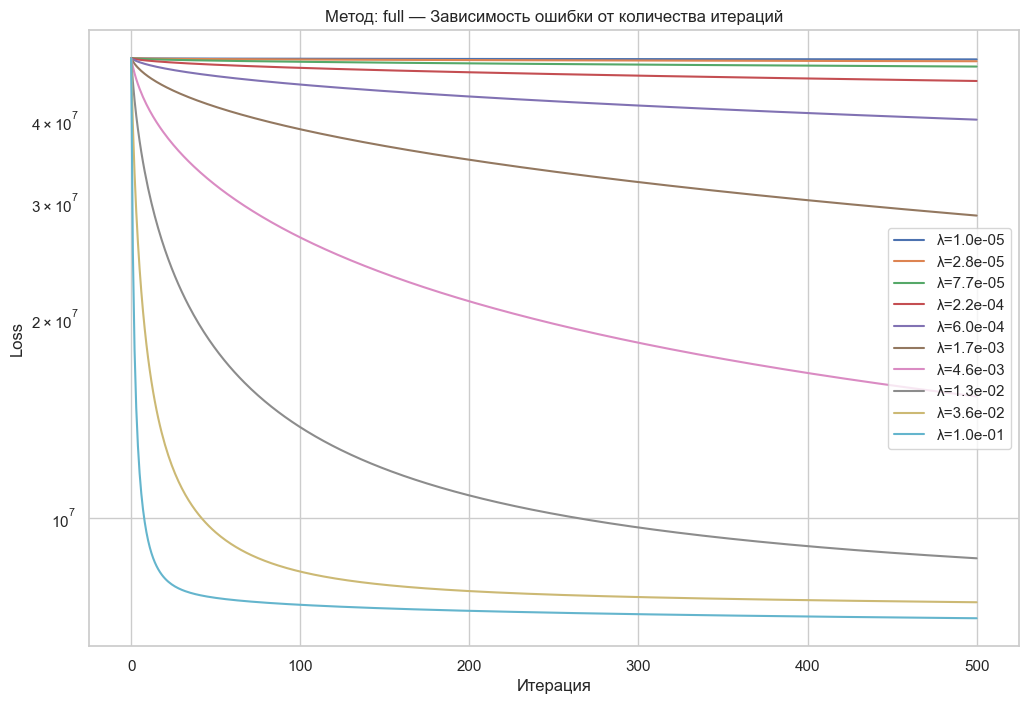

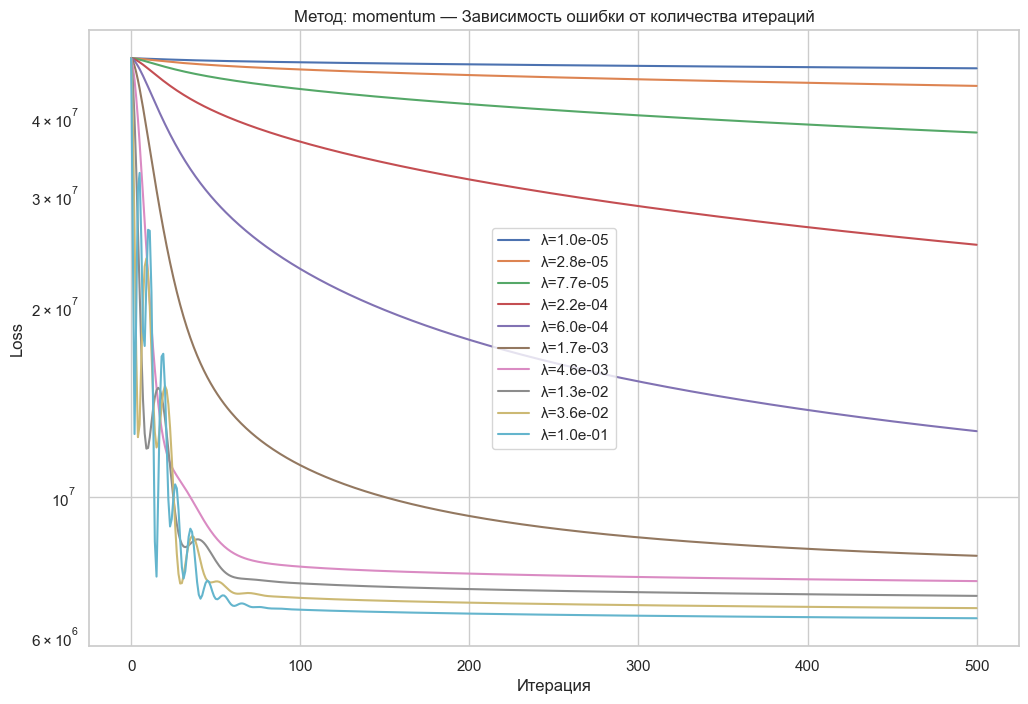

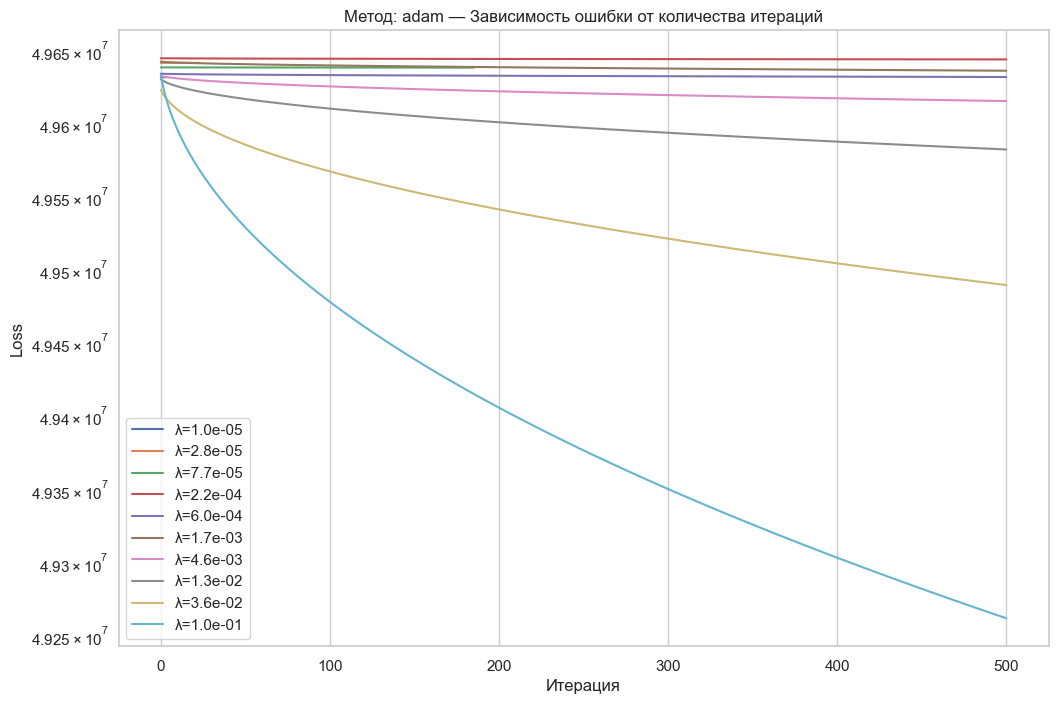

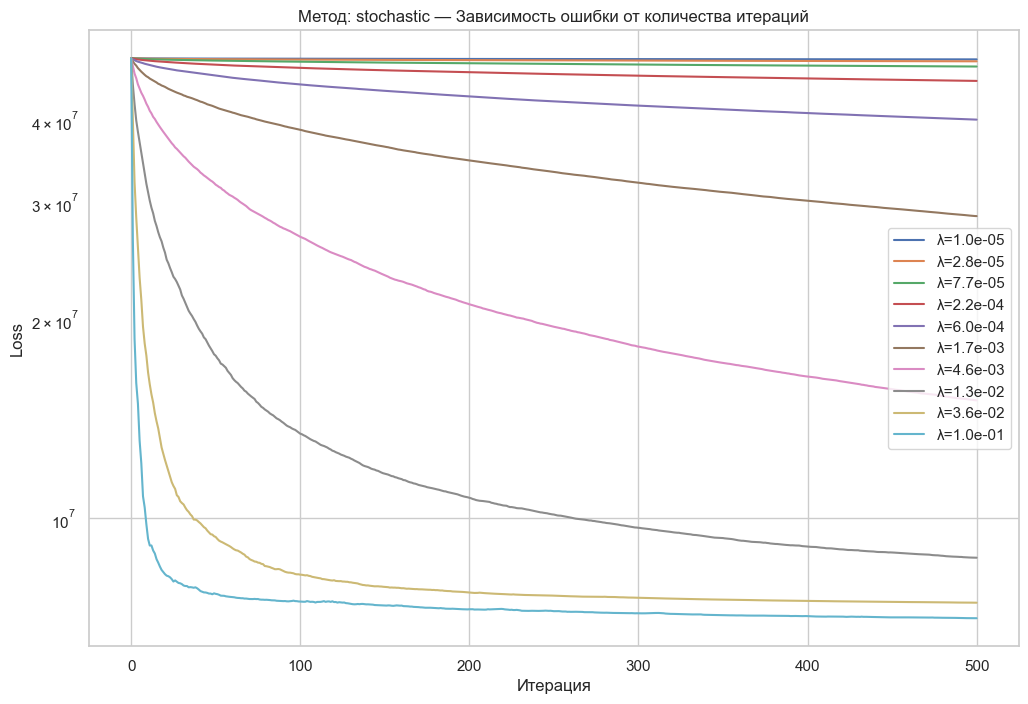

In [56]:
for method in methods:
    plt.figure(figsize=(12, 8))
    for lambda_ in lambdas:
        history = ex5_results[method][lambda_]['loss_history']
        plt.plot(range(len(history)), history, label=f"λ={lambda_:.1e}")
    plt.title(f"Метод: {method} — Зависимость ошибки от количества итераций")
    plt.xlabel("Итерация")
    plt.ylabel("Loss")
    plt.legend()
    plt.yscale('log')
    plt.show()

In [57]:
for method in methods:
    df = pd.DataFrame.from_dict(ex5_results[method], orient='index')
    df.index.name = 'lambda'
    df.reset_index(inplace=True)
    print(f"\nМетод: {method}")
    display(df[['lambda', 'train_mse', 'val_mse', 'train_r2', 'val_r2', 'n_iterations']])


Метод: full


,lambda,train_mse,val_mse,train_r2,val_r2,n_iterations
0,0.000010,4.945204e+07,4.947807e+07,-1.299640,-1.303322,500
1,0.000028,4.913203e+07,4.915739e+07,-1.284759,-1.288394,500
2,0.000077,4.822949e+07,4.825335e+07,-1.242789,-1.246308,500
3,0.000215,4.586310e+07,4.588326e+07,-1.132746,-1.135975,500
4,0.000599,4.008054e+07,4.009123e+07,-0.863843,-0.866342,500
5,0.001668,2.868591e+07,2.867836e+07,-0.333965,-0.335046,500
6,0.004642,1.526623e+07,1.524409e+07,0.290083,0.290351,500
7,0.012915,8.684280e+06,8.686681e+06,0.596160,0.595614,500
8,0.035938,7.450130e+06,7.488262e+06,0.653551,0.651404,500
9,0.100000,7.046047e+06,7.104354e+06,0.672342,0.669275,500



Метод: momentum


,lambda,train_mse,val_mse,train_r2,val_r2,n_iterations
0,0.000010,4.785123e+07,4.787459e+07,-1.225199,-1.228676,500
1,0.000028,4.487117e+07,4.488969e+07,-1.086619,-1.089722,500
2,0.000077,3.783608e+07,3.784315e+07,-0.759470,-0.761689,500
3,0.000215,2.510334e+07,2.509037e+07,-0.167367,-0.168017,500
4,0.000599,1.269905e+07,1.267846e+07,0.409463,0.409787,500
5,0.001668,8.052198e+06,8.065942e+06,0.625553,0.624511,500
6,0.004642,7.340279e+06,7.384945e+06,0.658659,0.656213,500
7,0.012915,6.954481e+06,7.017295e+06,0.676600,0.673328,500
8,0.035938,6.649802e+06,6.725037e+06,0.690768,0.686934,500
9,0.100000,6.408247e+06,6.489143e+06,0.702001,0.697915,500



Метод: adam


,lambda,train_mse,val_mse,train_r2,val_r2,n_iterations
0,0.000010,4.963187e+07,4.965805e+07,-1.308003,-1.311700,3
1,0.000028,4.964172e+07,4.966783e+07,-1.308461,-1.312156,23
2,0.000077,4.963845e+07,4.966464e+07,-1.308309,-1.312008,185
3,0.000215,4.964408e+07,4.967023e+07,-1.308571,-1.312268,500
4,0.000599,4.963201e+07,4.965823e+07,-1.308009,-1.311709,500
5,0.001668,4.963632e+07,4.966250e+07,-1.308210,-1.311908,500
6,0.004642,4.961548e+07,4.964168e+07,-1.307241,-1.310938,500
7,0.012915,4.958232e+07,4.960838e+07,-1.305699,-1.309388,500
8,0.035938,4.948944e+07,4.951549e+07,-1.301380,-1.305064,500
9,0.100000,4.926203e+07,4.928791e+07,-1.290804,-1.294469,500



Метод: stochastic


,lambda,train_mse,val_mse,train_r2,val_r2,n_iterations
0,0.000010,4.945343e+07,4.947933e+07,-1.299705,-1.303381,500
1,0.000028,4.912177e+07,4.914717e+07,-1.284282,-1.287918,500
2,0.000077,4.823666e+07,4.826051e+07,-1.243122,-1.246642,500
3,0.000215,4.587917e+07,4.589935e+07,-1.133493,-1.136724,500
4,0.000599,4.009159e+07,4.010289e+07,-0.864356,-0.866885,500
5,0.001668,2.864817e+07,2.864085e+07,-0.332210,-0.333300,500
6,0.004642,1.507834e+07,1.505571e+07,0.298821,0.299121,500
7,0.012915,8.716950e+06,8.716633e+06,0.594641,0.594220,500
8,0.035938,7.452629e+06,7.494350e+06,0.653435,0.651120,500
9,0.100000,7.060505e+06,7.114199e+06,0.671669,0.668817,500


***Вывод:***

Лучшим оказался метод - momentum при значении лямбда = 0.1

Все методы были ограничены 500 итераций, но momentum показал наименьшую MSE  и наивысшие R2.

Для лямбда - малые значения приводит к низкому качеству моделей, средние значения - можно сравнивать методы, большие значения - приводят к нестабильности методов.

### Задание 5.2. Сравнение методов (0.5 балла)

Создайте график, на котором будет показана динамика изменения ошибки на обучающей выборке в зависимости от номера итерации для каждого из рассматриваемых методов. Разместите линии, представляющие каждый метод, на одном и том же графике для наглядного сравнения.

После анализа результатов, представленных в виде графика и таблиц с метриками, выполните сравнение методов. Обратите внимание на следующие аспекты:
- Как быстро каждый метод сходится к минимуму ошибки.
- Величину ошибки на обучающей и тестовой выборках для каждого метода.
- Значение метрики $R^2$ для каждого метода на обучающей и тестовой выборках.
- Количество итераций, необходимых для достижения сходимости.

На основе этих данных сделайте вывод о преимуществах и недостатках каждого из методов в контексте вашей задачи.

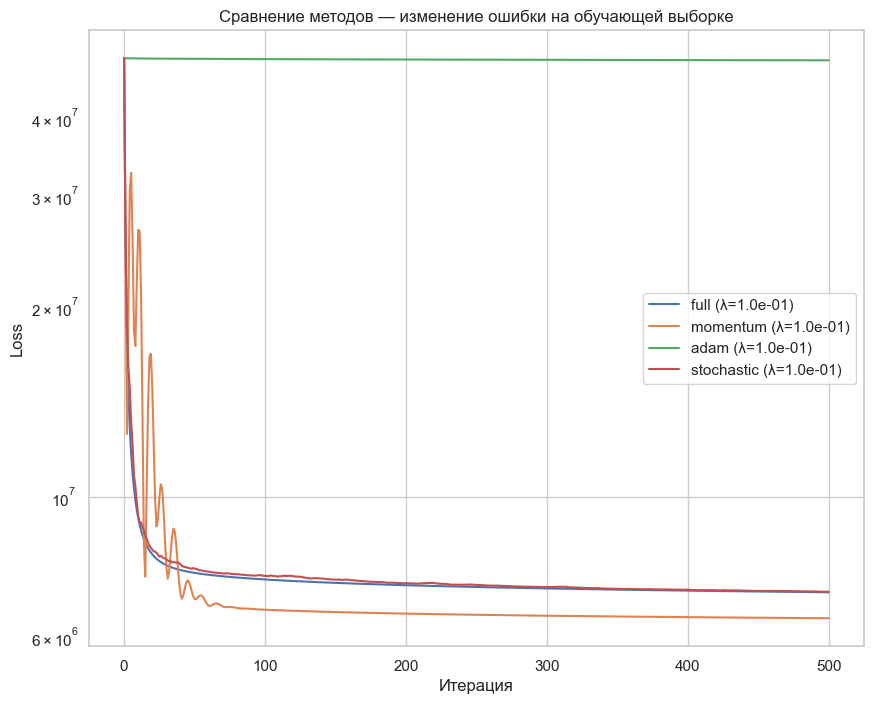

In [58]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

plt.figure(figsize=(10, 8))

for method in methods:
    df_method = pd.DataFrame.from_dict(ex5_results[method], orient='index')
    df_method.index.name = 'lambda'
    df_method.reset_index(inplace=True)
    best_lambda = df_method.sort_values('val_mse').iloc[0]['lambda']
    history = ex5_results[method][best_lambda]['loss_history']
    plt.plot(range(len(history)), history, label=f"{method} (λ={best_lambda:.1e})")

plt.title("Сравнение методов — изменение ошибки на обучающей выборке")
plt.xlabel("Итерация")
plt.ylabel("Loss")
plt.legend()
plt.yscale('log')
plt.show()

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

***full:*** метод не сошелся, но ошибка быстро падает, за 500 итераций функция потерь снижается, но не достигнуто минимальное значение.

***stochastic:*** аналогично с full.

***momentum:*** тоже не сошелся, ошибка падает медленнее чем у full, за 500 итераций было достигнуто более низкое значение функции потерь. Ошибка самая маленькая.

***adam:*** сошелся несколько раз с неадекватными результатами, функция потерь почти не снижается, метод за 500 итераций не показал эффективность. Ошибка самая большая.

В контексте задачи метод full показал себя стабильным, но из графика видно что он не самый лучший. Stochastic - чуть менее стабилен. Adam - не подходит для задачи. Momentum - лучшее качество, быстре сходимость.

## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

In [35]:
y_train = y_train.values

In [36]:
import time
from sklearn.metrics import mean_squared_error, r2_score

batch_sizes = np.arange(5, 500, 10)

k_runs = 10

avg_times = []
avg_iterations = []
avg_train_losses = []
avg_val_losses = []
avg_train_r2_list = []
avg_val_r2_list = []

tolerance = 1e-4
max_iter = 100

for batch_size in batch_sizes:
    times = []
    iterations = []
    train_losses = []
    val_losses = []
    train_r2_scores = []
    val_r2_scores = []

    for run in range(k_runs):

        start_time = time.time()

        descent_config = {
            'descent_name': 'stochastic',
            'regularized': False,
            'kwargs': {
                'dimension': x_train.shape[1],
                'lambda_': 0.01,
                'batch_size': batch_size
            }
        }

        model = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter
        )

        model.fit(x_train, y_train)

        end_time = time.time()

        times.append(end_time - start_time)
        iterations.append(len(model.loss_history) - 1)

        y_train_pred = model.predict(x_train)
        y_val_pred = model.predict(x_val)

        train_loss = mean_squared_error(y_train, y_train_pred)
        val_loss = mean_squared_error(y_val, y_val_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        val_r2 = r2_score(y_val, y_val_pred)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_r2_scores.append(train_r2)
        val_r2_scores.append(val_r2)

    avg_time = np.mean(times)
    avg_iter = np.mean(iterations)
    avg_train_loss = np.mean(train_losses)
    avg_val_loss = np.mean(val_losses)
    avg_train_r2 = np.mean(train_r2_scores)
    avg_val_r2 = np.mean(val_r2_scores)

    avg_times.append(avg_time)
    avg_iterations.append(avg_iter)
    avg_train_losses.append(avg_train_loss)
    avg_val_losses.append(avg_val_loss)
    avg_train_r2_list.append(avg_train_r2)
    avg_val_r2_list.append(avg_val_r2)

    print(f"Размер батча: {batch_size}, Среднее время обучения: {avg_time:.4f} сек, "
          f"Среднее число итераций: {avg_iter:.1f}, "
          f"Train MSE: {avg_train_loss:.4f}, Val MSE: {avg_val_loss:.4f}, "
          f"Train R2: {avg_train_r2:.4f}, Val R2: {avg_val_r2:.4f}")



Достигнуто максимальное количество итераций: 100
Достигнуто максимальное количество итераций: 100
Достигнуто максимальное количество итераций: 100
Достигнуто максимальное количество итераций: 100
Достигнуто максимальное количество итераций: 100
Достигнуто максимальное количество итераций: 100
Достигнуто максимальное количество итераций: 100
Достигнуто максимальное количество итераций: 100
Достигнуто максимальное количество итераций: 100
Достигнуто максимальное количество итераций: 100
Размер батча: 5, Среднее время обучения: 0.2543 сек, Среднее число итераций: 100.0, Train MSE: 16770821.1660, Val MSE: 16746746.9138, Train R2: 0.2201, Val R2: 0.2204
Достигнуто максимальное количество итераций: 100
Достигнуто максимальное количество итераций: 100
Достигнуто максимальное количество итераций: 100
Достигнуто максимальное количество итераций: 100
Достигнуто максимальное количество итераций: 100
Достигнуто максимальное количество итераций: 100
Достигнуто максимальное количество итераций: 100


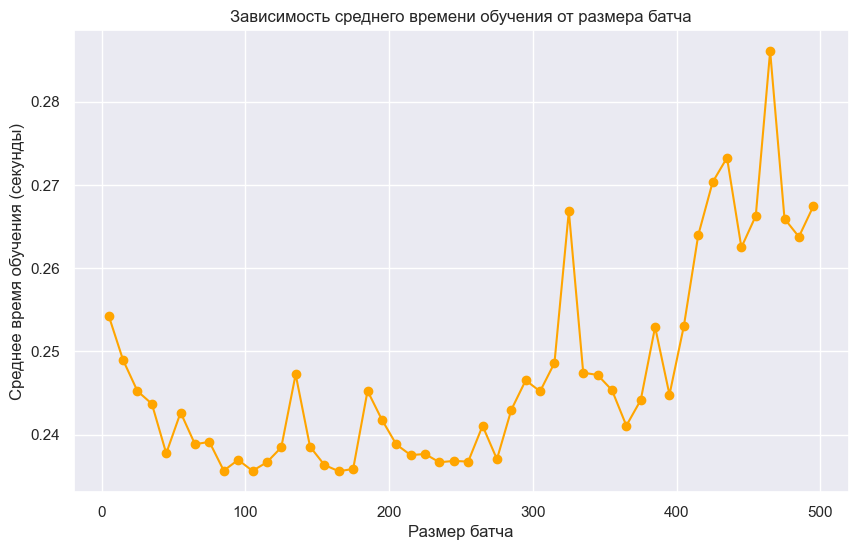

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, avg_times, marker='o', color='orange')
plt.title('Зависимость среднего времени обучения от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Среднее время обучения (секунды)')
plt.grid(True)
plt.show()

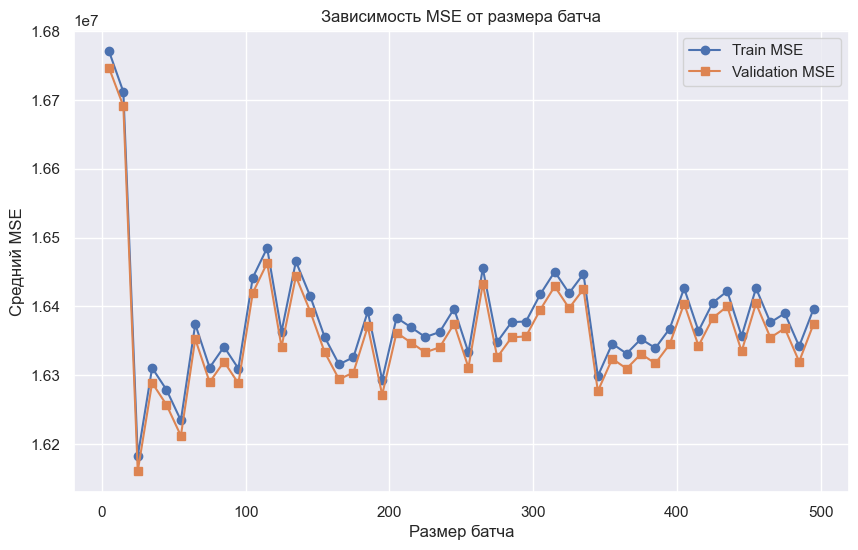

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, avg_train_losses, marker='o', label='Train MSE')
plt.plot(batch_sizes, avg_val_losses, marker='s', label='Validation MSE')
plt.title('Зависимость MSE от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Средний MSE')
plt.legend()
plt.grid(True)
plt.show()

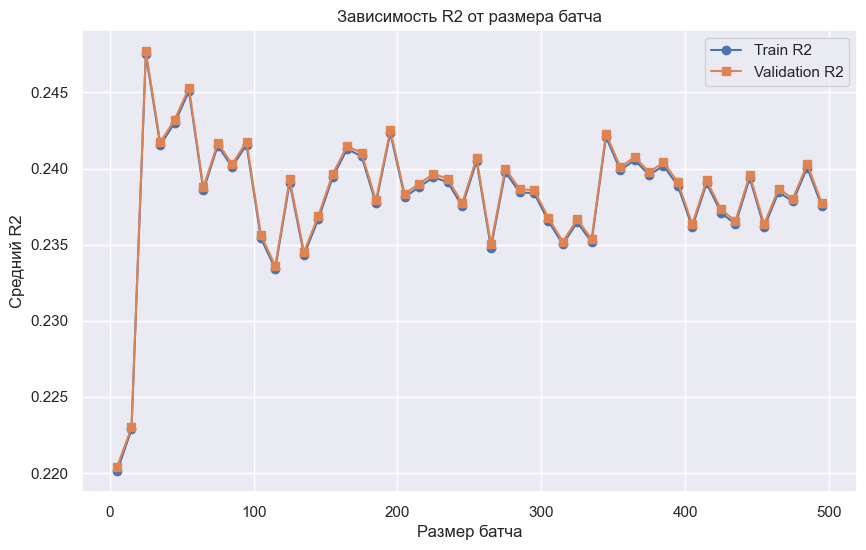

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, avg_train_r2_list, marker='o', label='Train R2')
plt.plot(batch_sizes, avg_val_r2_list, marker='s', label='Validation R2')
plt.title('Зависимость R2 от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Средний R2')
plt.legend()
plt.grid(True)
plt.show()

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ



Время обучения не показывает четкой линейной зависимости от размера батча.

Так как среднее число итераций во всех случаях равно 100, время обучения в основном зависит от времени выполнения одной итерации.

А для одной итерации:

При малом размере батча - на одной итерации обрабатывается меньше данных.

При большом размере батча - на одной итерации обрабатывается больше данных.

При тестировании локально, на 500 и 1000 max_iter я заметил некоторую линейную зависимость - время обучения увеличивается с размером батча, но в пределах погрешности, при min=1.2 сек и max=1.8 сек. Для остальных графиков, ситуация особо не меняется

## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


In [59]:
import itertools

lambdas = np.logspace(-5, -1, 6)
mu_values = np.logspace(-3, 2, 6)
methods = ['full', 'momentum', 'adam', 'stochastic']

tolerance = 1e-4
max_iter = 500

ex7_results = {method: {} for method in methods}

for method in methods:
    for lambda_, mu in itertools.product(lambdas, mu_values):
        descent_kwargs = {
            'dimension': x_train.shape[1],
            'lambda_': lambda_,
            'mu': mu
        }

        descent_config = {
            'descent_name': method,
            'regularized': True,
            'kwargs': descent_kwargs
        }

        model = LinearRegression(descent_config=descent_config, tolerance=tolerance, max_iter=max_iter)
        model.fit(x_train, y_train)

        y_train_pred = model.predict(x_train)
        y_val_pred = model.predict(x_val)

        train_mse = mean_squared_error(y_train, y_train_pred)
        val_mse = mean_squared_error(y_val, y_val_pred)

        train_r2 = r2_score(y_train, y_train_pred)
        val_r2 = r2_score(y_val, y_val_pred)

        n_iterations = len(model.loss_history) - 1

        ex7_results[method][(lambda_, mu)] = {
            'train_mse': train_mse,
            'val_mse': val_mse,
            'train_r2': train_r2,
            'val_r2': val_r2,
            'n_iterations': n_iterations,
            'loss_history': model.loss_history
        }

        print(f"Метод: {method}, λ: {lambda_:.1e}, μ: {mu:.1e}, "
              f"Итераций: {n_iterations}, Train MSE: {train_mse:.4f}, Val MSE: {val_mse:.4f}, "
              f"Train R2: {train_r2:.4f}, Val R2: {val_r2:.4f}")

Достигнуто максимальное количество итераций: 500
Метод: full, λ: 1.0e-05, μ: 1.0e-03, Итераций: 500, Train MSE: 49446080.7827, Val MSE: 49471995.4647, Train R2: -1.2994, Val R2: -1.3030
Достигнуто максимальное количество итераций: 500
Метод: full, λ: 1.0e-05, μ: 1.0e-02, Итераций: 500, Train MSE: 49461443.7582, Val MSE: 49487374.8212, Train R2: -1.3001, Val R2: -1.3038
Достигнуто максимальное количество итераций: 500
Метод: full, λ: 1.0e-05, μ: 1.0e-01, Итераций: 500, Train MSE: 49447994.2176, Val MSE: 49473983.1903, Train R2: -1.2995, Val R2: -1.3031
Достигнуто максимальное количество итераций: 500
Метод: full, λ: 1.0e-05, μ: 1.0e+00, Итераций: 500, Train MSE: 49463454.2380, Val MSE: 49489335.3062, Train R2: -1.3002, Val R2: -1.3038
Достигнуто максимальное количество итераций: 500
Метод: full, λ: 1.0e-05, μ: 1.0e+01, Итераций: 500, Train MSE: 49452543.9515, Val MSE: 49478491.8079, Train R2: -1.2997, Val R2: -1.3033
Достигнуто максимальное количество итераций: 500
Метод: full, λ: 1.0e-

Сравнение метрик с и без регуляризации для каждого метода:
Метод: full
  Без регуляризации:
    Val MSE: 7104354.450241714
    Val R2: 0.6692753771912177
    Train MSE: 7046047.181772347
    Train R2: 0.6723416481356677
  С регуляризацией (mu=0.001):
    Val MSE: 7105088.08008167
    Val R2: 0.6692412249746018
    Train MSE: 7046858.955123244
    Train R2: 0.672303898698092
--------------------------------------------------
Метод: momentum
  Без регуляризации:
    Val MSE: 6489142.570687683
    Val R2: 0.6979149556691844
    Train MSE: 6408246.597944529
    Train R2: 0.7020009283993238
  С регуляризацией (mu=0.001):
    Val MSE: 6494295.795941212
    Val R2: 0.6976750607582309
    Train MSE: 6413801.411091008
    Train R2: 0.7017426160614222
--------------------------------------------------
Метод: adam
  Без регуляризации:
    Val MSE: 49287906.28038281
    Val R2: -1.2944694451526995
    Train MSE: 49262031.58470544
    Train R2: -1.290804427238191
  С регуляризацией (mu=0.001):
    

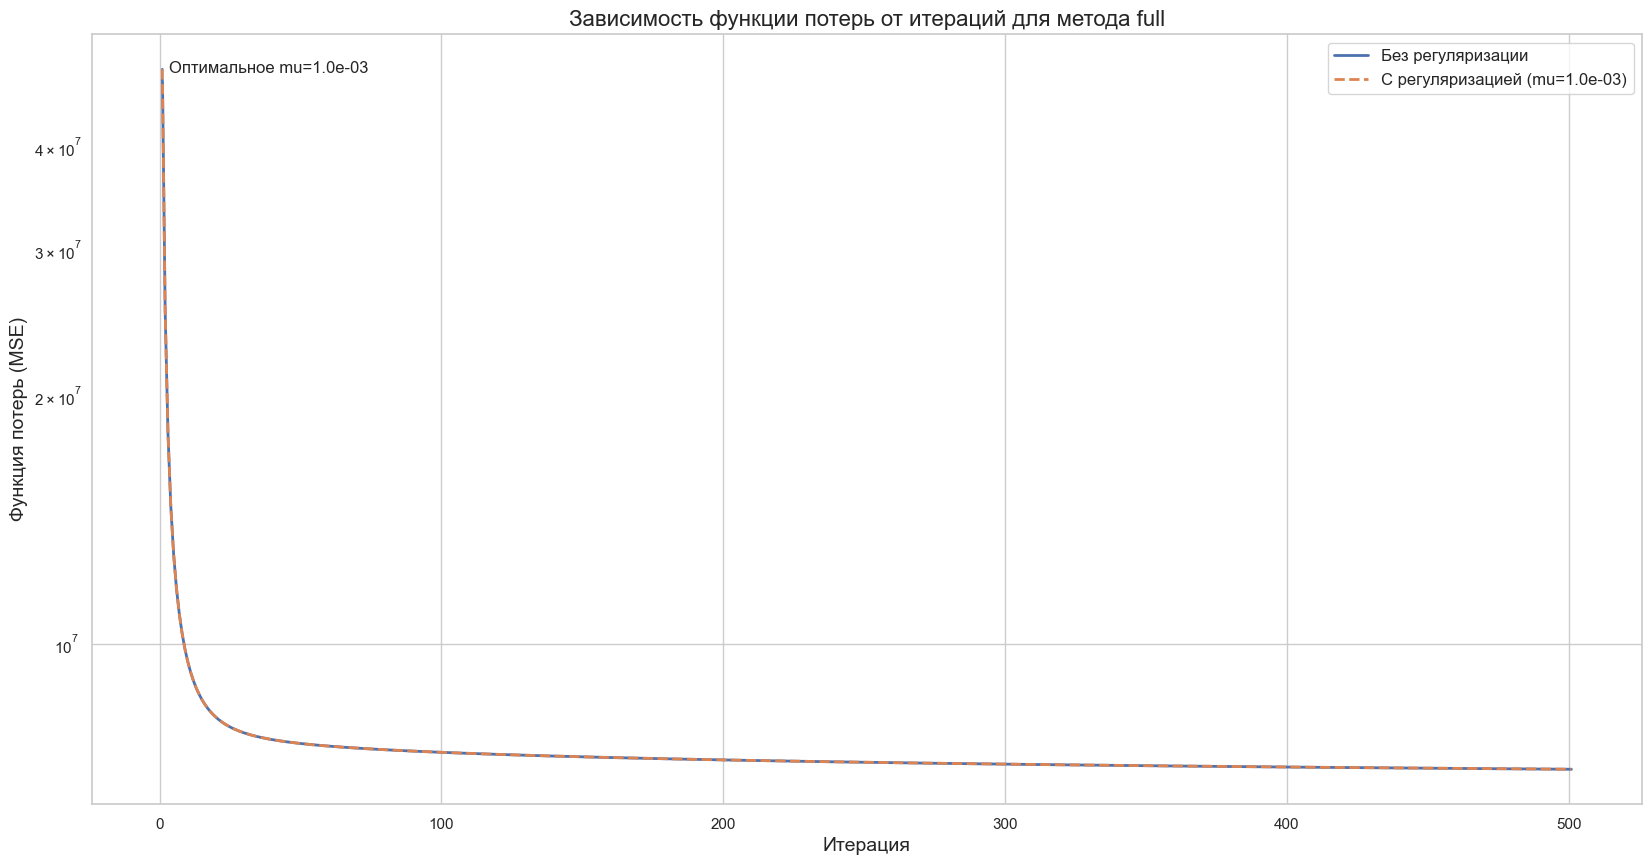

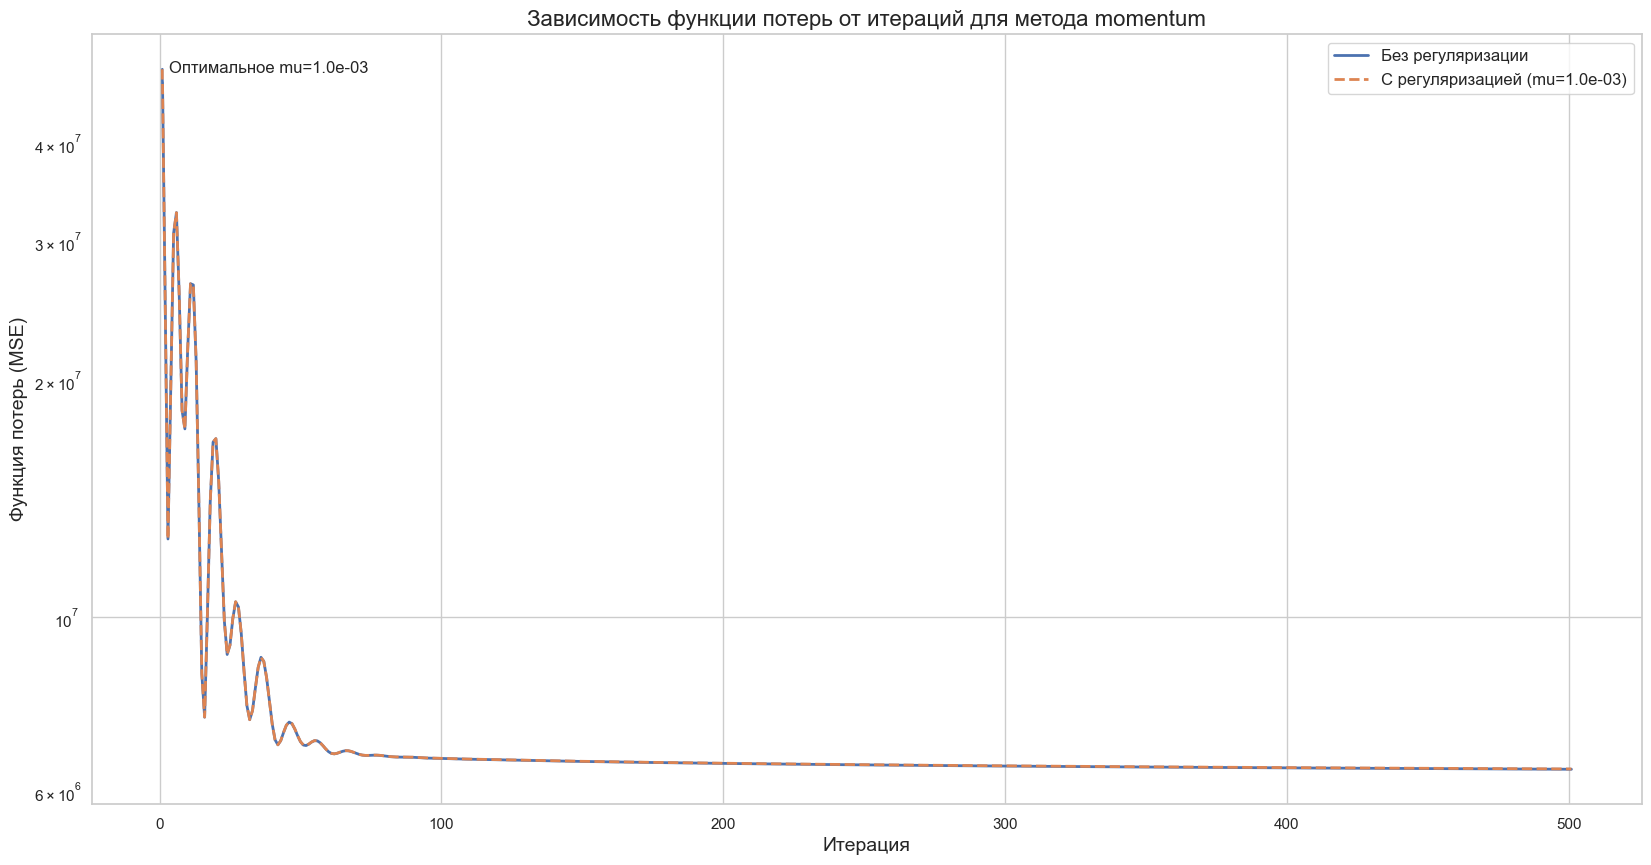

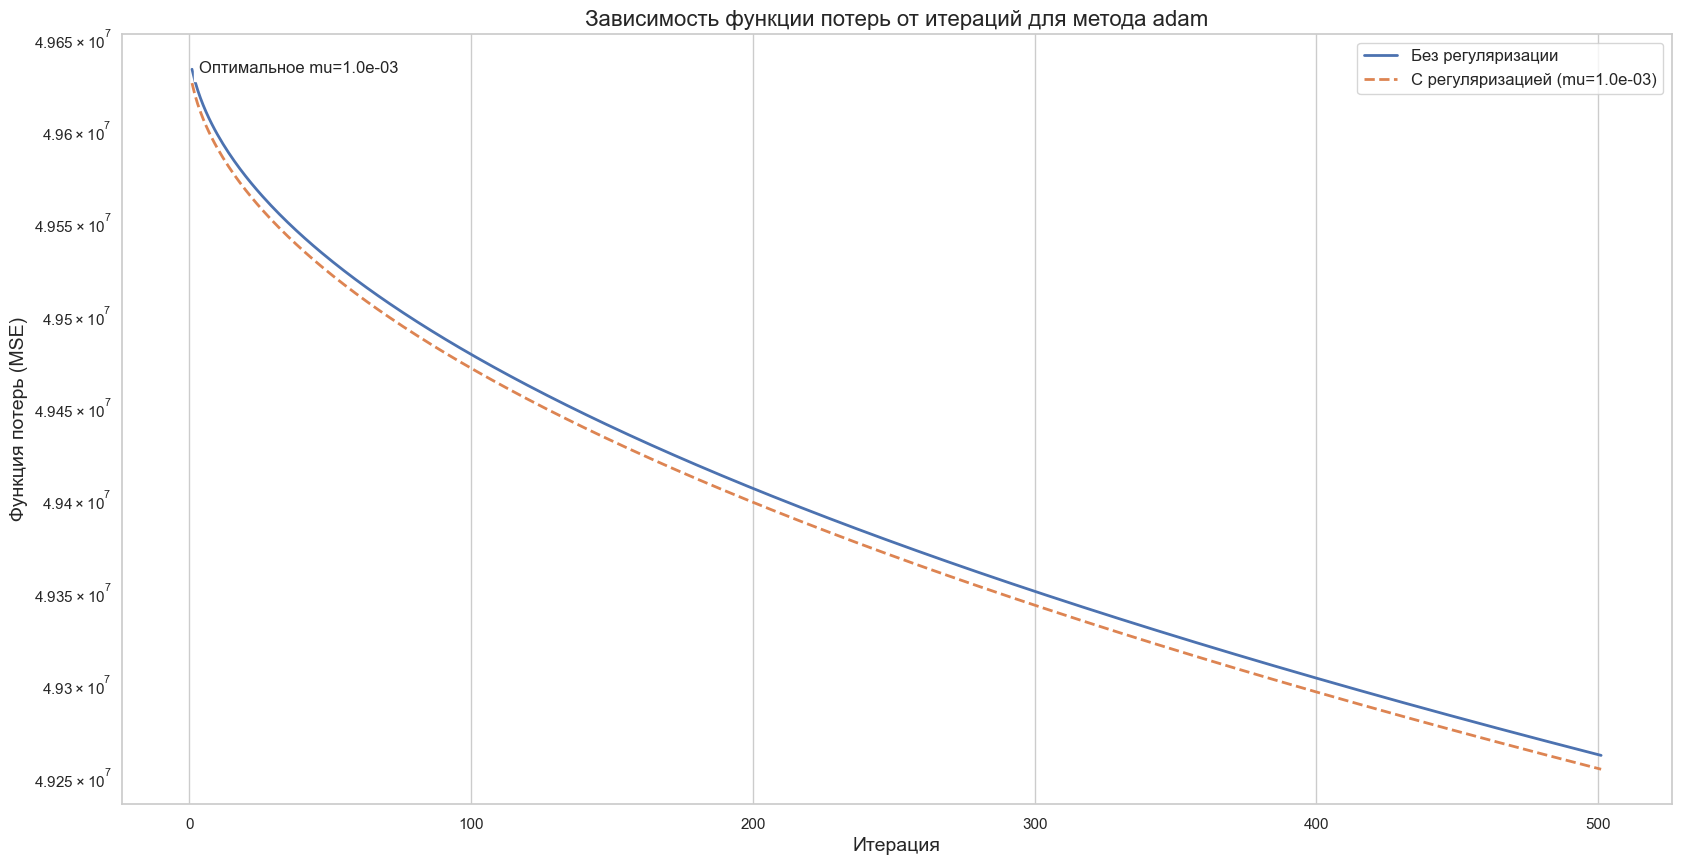

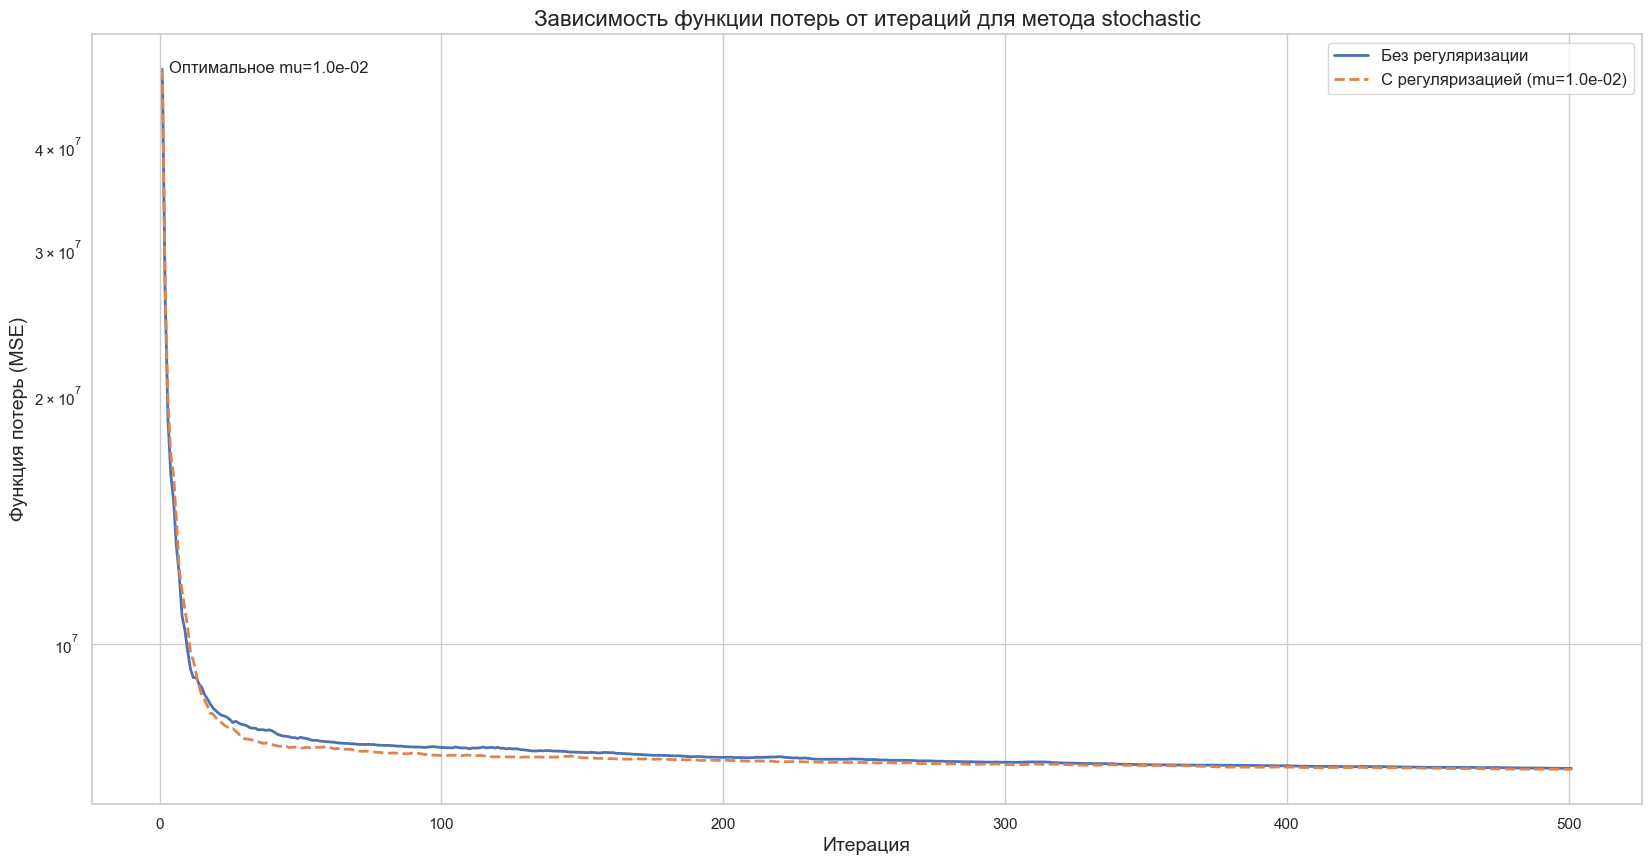

In [60]:
fixed_lambda = 0.1

comparison_data = []

for method in methods:

    results_no_reg = ex5_results[method][fixed_lambda]
    val_mse_no_reg = results_no_reg['val_mse']
    val_r2_no_reg = results_no_reg['val_r2']
    train_mse_no_reg = results_no_reg['train_mse']
    train_r2_no_reg = results_no_reg['train_r2']

    best_config = min(ex7_results[method].items(), key=lambda x: x[1]['val_mse'])[0]
    lambda_reg, mu_reg = best_config
    results_reg = ex7_results[method][best_config]
    val_mse_with_reg = results_reg['val_mse']
    val_r2_with_reg = results_reg['val_r2']
    train_mse_with_reg = results_reg['train_mse']
    train_r2_with_reg = results_reg['train_r2']
    
    comparison_data.append({
        'method': method,
        'mu': mu_reg,
        'val_mse_with_reg': val_mse_with_reg,
        'val_mse_no_reg': val_mse_no_reg,
        'val_r2_with_reg': val_r2_with_reg,
        'val_r2_no_reg': val_r2_no_reg,
        'train_mse_with_reg': train_mse_with_reg,
        'train_mse_no_reg': train_mse_no_reg,
        'train_r2_with_reg': train_r2_with_reg,
        'train_r2_no_reg': train_r2_no_reg
    })

comparison_df = pd.DataFrame(comparison_data)

print("Сравнение метрик с и без регуляризации для каждого метода:")
for idx, row in comparison_df.iterrows():
    method = row['method']
    mu = row['mu']
    print(f"Метод: {method}")
    print(f"  Без регуляризации:")
    print(f"    Val MSE: {row['val_mse_no_reg']}")
    print(f"    Val R2: {row['val_r2_no_reg']}")
    print(f"    Train MSE: {row['train_mse_no_reg']}")
    print(f"    Train R2: {row['train_r2_no_reg']}")
    print(f"  С регуляризацией (mu={mu}):")
    print(f"    Val MSE: {row['val_mse_with_reg']}")
    print(f"    Val R2: {row['val_r2_with_reg']}")
    print(f"    Train MSE: {row['train_mse_with_reg']}")
    print(f"    Train R2: {row['train_r2_with_reg']}")
    print("-" * 50)

for method in methods:
    plt.figure(figsize=(20,10))
    
    loss_no_reg = ex5_results[method][fixed_lambda]['loss_history']

    mu_reg = comparison_df[comparison_df['method'] == method]['mu'].values[0]
    best_config = (fixed_lambda, mu_reg)

    loss_reg = ex7_results[method][best_config]['loss_history']
    
    iterations_no_reg = range(1, len(loss_no_reg) + 1)
    iterations_reg = range(1, len(loss_reg) + 1)

    plt.plot(iterations_no_reg, loss_no_reg, label='Без регуляризации', linestyle='-', linewidth=2)
    plt.plot(iterations_reg, loss_reg, label=f'С регуляризацией (mu={mu_reg:.1e})', linestyle='--', linewidth=2)

    plt.annotate(f'Оптимальное mu={mu_reg:.1e}', xy=(0.05, 0.95), xycoords='axes fraction',
                 fontsize=12, backgroundcolor='white')

    plt.xlabel('Итерация', fontsize=14)
    plt.ylabel('Функция потерь (MSE)', fontsize=14)
    plt.title(f'Зависимость функции потерь от итераций для метода {method}', fontsize=16)
    plt.legend(fontsize=12)
    plt.yscale('log')
    plt.grid(True)
    plt.show()

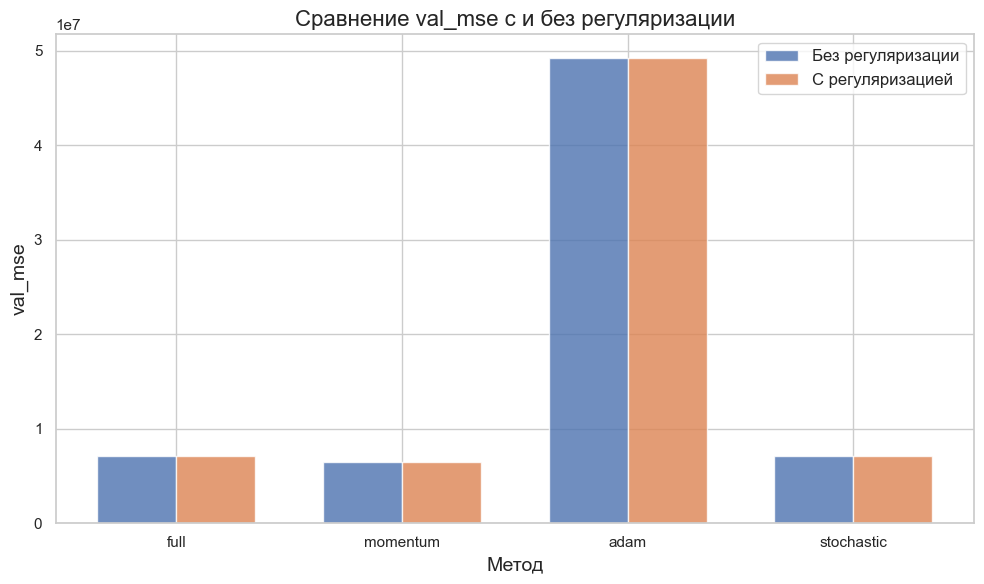

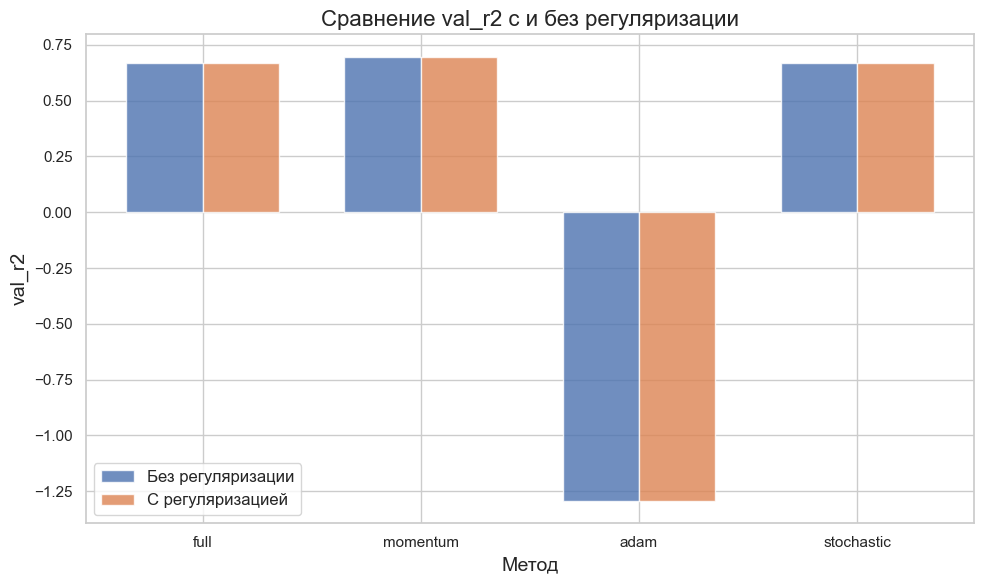

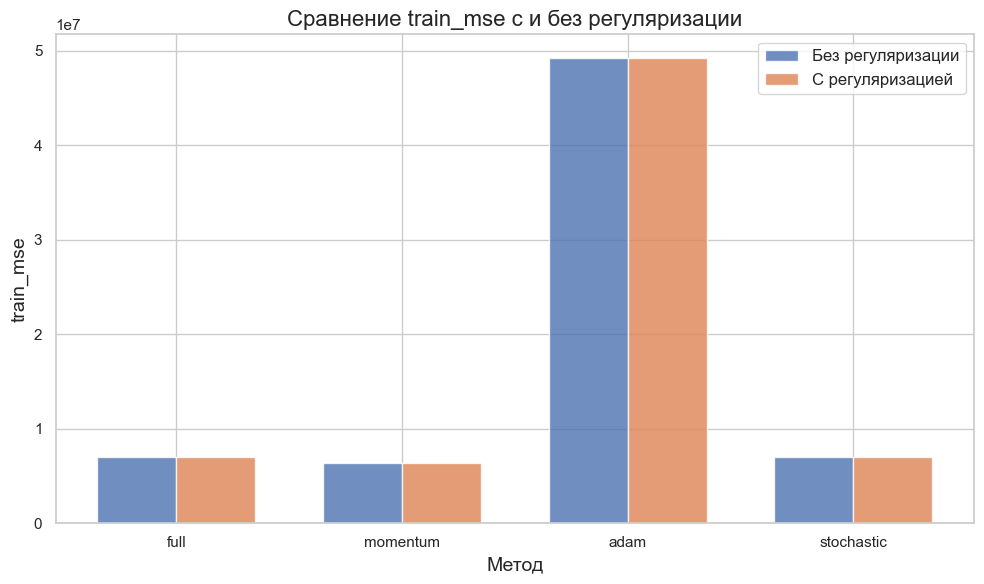

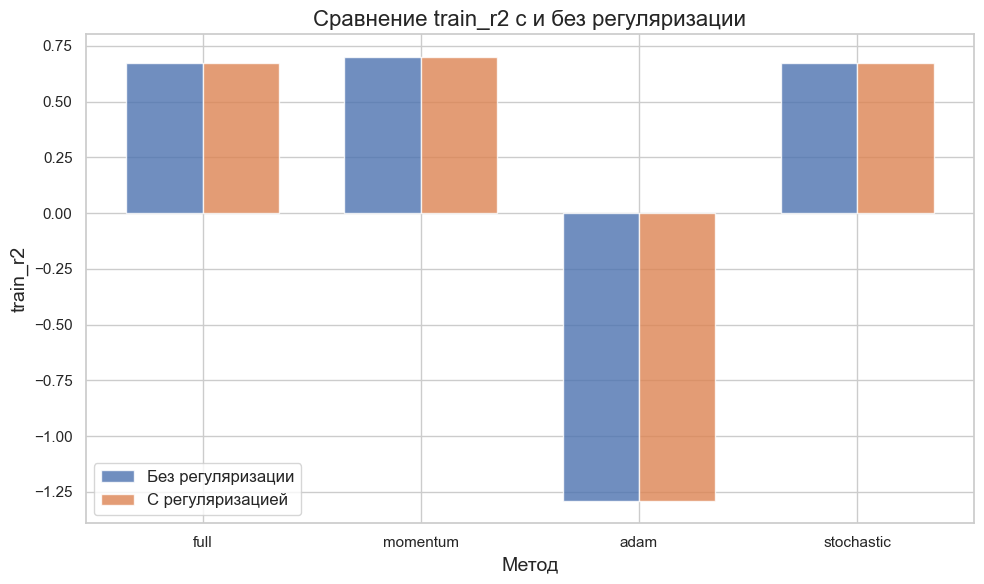

In [61]:
metrics = ['val_mse', 'val_r2', 'train_mse', 'train_r2']

for metric in metrics:
    plt.figure(figsize=(10,6))
    index = np.arange(len(methods))
    bar_width = 0.35
    opacity = 0.8

    values_no_reg = comparison_df[f'{metric}_no_reg']
    values_with_reg = comparison_df[f'{metric}_with_reg']

    plt.bar(index, values_no_reg, bar_width, alpha=opacity, label='Без регуляризации')
    plt.bar(index + bar_width, values_with_reg, bar_width, alpha=opacity, label='С регуляризацией')

    plt.xlabel('Метод', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.title(f'Сравнение {metric} с и без регуляризации', fontsize=16)
    plt.xticks(index + bar_width / 2, methods)
    plt.legend(fontsize=12)

    plt.tight_layout()
    plt.show()

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Для методов full и momentum добавление регуляризации практически не изменило ошибку на валидационной выборке.

Для метода adam я провел несколько экспериментов с различными mu, в целом сильного влияния не обнаружено, иногда лучше иногда чуть чуть хуже.

Для метода stochastic по минимальным значениям R2 и MSE можно заметить, что регуляризация улучшила результат, но опять же разница не особо велика.

В целом, регуляризация должна была предотвратить переобучение модели и уменьшить loss, но по факту для моих моделей ничего особо не изменилось.

Регуляризация улучшает модель если: модель сложная (много признаков), признаки кореллируют, есть лишние признаки.
Регуляризация ухудшает модель если: модель простая (мало признаков), параметры подобраны криво, в методе модели уже зашита какая-то оптимизация (типо adam).

## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$


Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

L(y,a) = log(cosh(a-y))

F(x) = log(cosh(g(x)))

∇xF(x) = tanh(g(x)) * (g(x))'

∇wL(y,a) = tanh(Xw - Y) * (X)

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [85]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

from descents import get_descent, LossFunction

best_lambdas = {}

for method in methods:
    df_method = pd.DataFrame.from_dict(ex5_results[method], orient='index')
    df_method.index.name = 'lambda'
    df_method.reset_index(inplace=True)
    best_lambda = df_method.sort_values('val_mse').iloc[0]['lambda']
    best_lambdas[method] = best_lambda

methods = ['full', 'momentum', 'adam', 'stochastic']

logcosh_results = {}

tolerance = 1e-4
max_iter = 500

for method in methods:
    print(f"Обучение модели с методом {method} и функцией потерь Log-Cosh")

    lambda_ = best_lambdas[method]

    descent_config = {
        'descent_name': method,
        'regularized': False,
        'kwargs': {
            'dimension': x_train.shape[1],
            'lambda_': lambda_,
            'loss_function': LossFunction.LogCosh
        }
    }

    model = get_descent(descent_config)

    loss_history = []

    for iteration in range(max_iter):
        delta_w = model.step(x_train, y_train)
        loss = model.calc_loss(x_train, y_train)
        loss_history.append(loss)
        if np.linalg.norm(delta_w) < tolerance:
            print(f"Алгоритм {method} сошёлся на итерации {iteration}")
            break

    y_train_pred = model.predict(x_train)
    y_val_pred = model.predict(x_val)

    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    logcosh_results[method] = {
        'train_mse': train_mse,
        'val_mse': val_mse,
        'train_r2': train_r2,
        'val_r2': val_r2,
        'n_iterations': iteration + 1,
        'loss_history': loss_history
    }
    
    print(f"Метод {method}: Val MSE = {val_mse}, Val R2 = {val_r2}")
    print("-" * 50)

Обучение модели с методом full и функцией потерь Log-Cosh
Метод full: Val MSE = 7104236.391898677, Val R2 = 0.6692808730883106
--------------------------------------------------
Обучение модели с методом momentum и функцией потерь Log-Cosh
Метод momentum: Val MSE = 6489144.419390021, Val R2 = 0.6979148696076867
--------------------------------------------------
Обучение модели с методом adam и функцией потерь Log-Cosh
Метод adam: Val MSE = 49293314.33694723, Val R2 = -1.294721203068204
--------------------------------------------------
Обучение модели с методом stochastic и функцией потерь Log-Cosh
Метод stochastic: Val MSE = 7100438.486095824, Val R2 = 0.669457674650354
--------------------------------------------------


       method loss_function       val_mse    val_r2     train_mse  train_r2  \
0        full           MSE  7.104354e+06  0.669275  7.046047e+06  0.672342   
1        full      Log-Cosh  7.104236e+06  0.669281  7.045913e+06  0.672348   
2    momentum           MSE  6.489143e+06  0.697915  6.408247e+06  0.702001   
3    momentum      Log-Cosh  6.489144e+06  0.697915  6.408248e+06  0.702001   
4        adam           MSE  4.928791e+07 -1.294469  4.926203e+07 -1.290804   
5        adam      Log-Cosh  4.929331e+07 -1.294721  4.926748e+07 -1.291058   
6  stochastic           MSE  7.114199e+06  0.668817  7.060505e+06  0.671669   
7  stochastic      Log-Cosh  7.100438e+06  0.669458  7.041863e+06  0.672536   

   n_iterations  
0           500  
1           500  
2           500  
3           500  
4           500  
5           500  
6           500  
7           500  


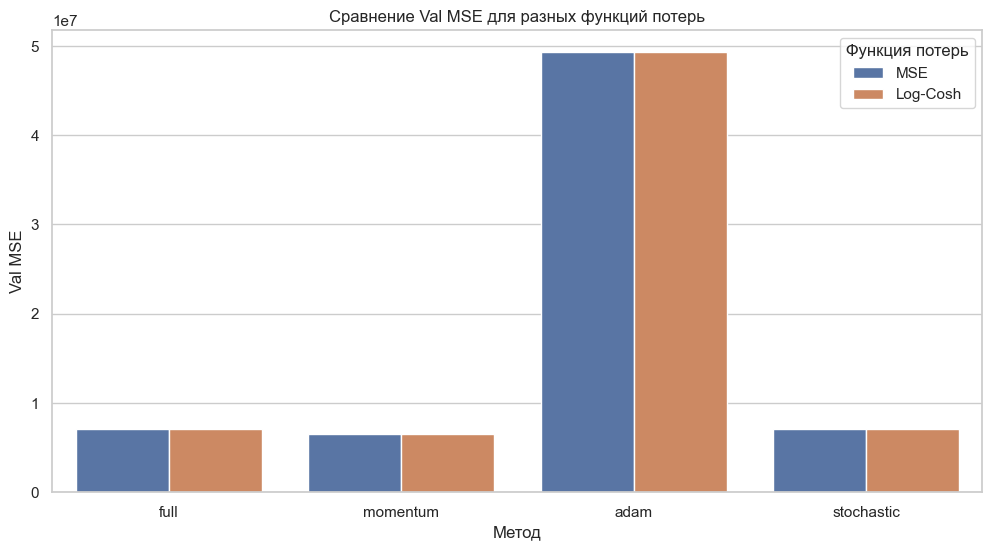

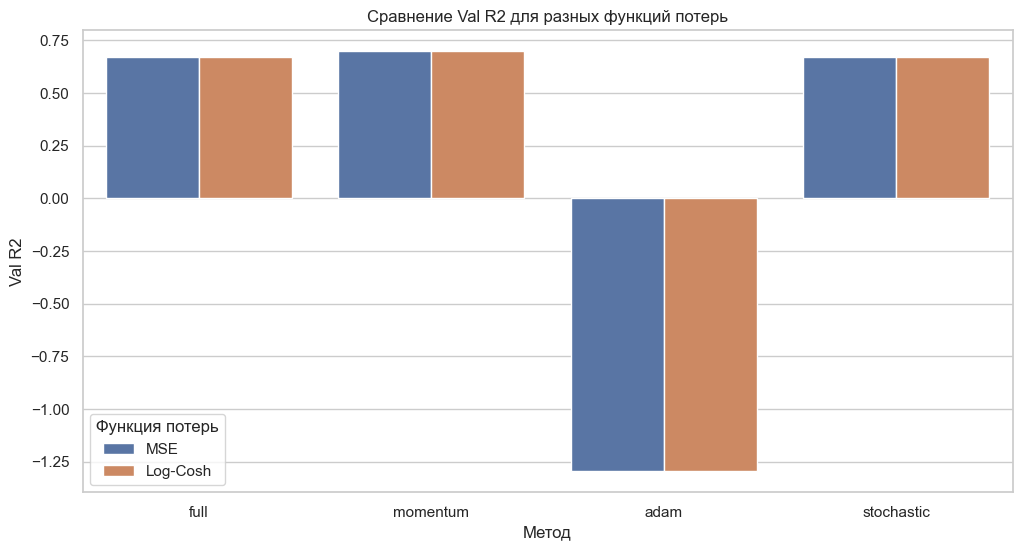

In [86]:
data = []

for method in methods:
    mse_res = ex5_results[method][best_lambdas[method]]
    logcosh_res = logcosh_results[method]

    data.append({
        'method': method,
        'loss_function': 'MSE',
        'val_mse': mse_res['val_mse'],
        'val_r2': mse_res['val_r2'],
        'train_mse': mse_res['train_mse'],
        'train_r2': mse_res['train_r2'],
        'n_iterations': mse_res['n_iterations']
    })

    data.append({
        'method': method,
        'loss_function': 'Log-Cosh',
        'val_mse': logcosh_res['val_mse'],
        'val_r2': logcosh_res['val_r2'],
        'train_mse': logcosh_res['train_mse'],
        'train_r2': logcosh_res['train_r2'],
        'n_iterations': logcosh_res['n_iterations']
    })

comparison_df = pd.DataFrame(data)
print(comparison_df)

plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x='method', y='val_mse', hue='loss_function')
plt.title('Сравнение Val MSE для разных функций потерь')
plt.ylabel('Val MSE')
plt.xlabel('Метод')
plt.legend(title='Функция потерь')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x='method', y='val_r2', hue='loss_function')
plt.title('Сравнение Val R2 для разных функций потерь')
plt.ylabel('Val R2')
plt.xlabel('Метод')
plt.legend(title='Функция потерь')
plt.show()

In [87]:
data = []

for method in methods:
    mse_res = ex5_results[method][best_lambdas[method]]
    mse_loss_history = mse_res['loss_history']

    logcosh_res = logcosh_results[method]
    logcosh_loss_history = logcosh_res['loss_history']

    data.append({
        'method': method,
        'loss_function': 'MSE',
        'val_mse': mse_res['val_mse'],
        'val_r2': mse_res['val_r2'],
        'train_mse': mse_res['train_mse'],
        'train_r2': mse_res['train_r2'],
        'n_iterations': mse_res['n_iterations'],
        'initial_loss': mse_loss_history[0],
        'final_loss': mse_loss_history[-1]
    })

    data.append({
        'method': method,
        'loss_function': 'Log-Cosh',
        'val_mse': logcosh_res['val_mse'],
        'val_r2': logcosh_res['val_r2'],
        'train_mse': logcosh_res['train_mse'],
        'train_r2': logcosh_res['train_r2'],
        'n_iterations': logcosh_res['n_iterations'],
        'initial_loss': logcosh_loss_history[0],
        'final_loss': logcosh_loss_history[-1]
    })

comparison_df = pd.DataFrame(data)
print(comparison_df)

       method loss_function       val_mse    val_r2     train_mse  train_r2  \
0        full           MSE  7.104354e+06  0.669275  7.046047e+06  0.672342   
1        full      Log-Cosh  7.104236e+06  0.669281  7.045913e+06  0.672348   
2    momentum           MSE  6.489143e+06  0.697915  6.408247e+06  0.702001   
3    momentum      Log-Cosh  6.489144e+06  0.697915  6.408248e+06  0.702001   
4        adam           MSE  4.928791e+07 -1.294469  4.926203e+07 -1.290804   
5        adam      Log-Cosh  4.929331e+07 -1.294721  4.926748e+07 -1.291058   
6  stochastic           MSE  7.114199e+06  0.668817  7.060505e+06  0.671669   
7  stochastic      Log-Cosh  7.100438e+06  0.669458  7.041863e+06  0.672536   

   n_iterations  initial_loss    final_loss  
0           500  4.963519e+07  7.046047e+06  
1           500  7.355366e+00  7.045572e+00  
2           500  4.963169e+07  6.408247e+06  
3           500  7.355526e+00  6.991923e+00  
4           500  4.963347e+07  4.926203e+07  
5           